<a href="https://colab.research.google.com/github/ago2020/Big-data-processing/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

#filename = '/content/법무부_3(출입국심사)연도별 국적(지역)별 외국인 입국자 현황_20211231.csv'
filename = '/content/drive/Othercomputers/내 컴퓨터 (3)/2022년 3학년 2학기/1.1 빅데이터처리/빅데이터 프로젝트/법무부_3(출입국심사)연도별 국적(지역)별 외국인 입국자 현황_20211231.csv'

import pandas as pd
df = pd.read_csv(filename, encoding='cp949')
# totdel = df[df['국적지역'].str.contains('합계')].index
# df.drop(totdel, inplace=True)

#df_sorted_by_values = df.sort_values(by=['년', '입국자수'] ,ascending=False)
#df_sorted_by_values.head(20)

# df_sorted_by_values = df.sort_values(by=['입국자수'] ,ascending=False)
# df_sorted_by_values.head(30)
df

,년,국적지역,입국자수
0,2011,합계,8666503
1,2011,가나,2073
2,2011,가봉,241
3,2011,가이아나,27
4,2011,감비아,42
...,...,...,...
2298,2021,핀란드,2912
2299,2021,필리핀,117316
2300,2021,한국계중국인,65929
2301,2021,헝가리,1051


In [ ]:
import pandas as pd

pd.options.display.float_format = '{:.0f}'.format
# pd.reset_option('display.float_format')

df_groupby_sum = df.groupby('국적지역').sum()
df_groupby_max = df.groupby('국적지역').max()
df_groupby_mean = df.groupby('국적지역').mean()

df_groupby_sum = df_groupby_sum.sort_values(by=['입국자수'] ,ascending=False)
df_groupby_max = df_groupby_max.sort_values(by=['입국자수'] ,ascending=False)
df_groupby_mean = df_groupby_mean.sort_values(by=['입국자수'] ,ascending=False)

print('합계정렬')
print(df_groupby_sum.head(11))

print('\n최대정렬')
print(df_groupby_max.head(11))

print('\n평균정렬')
print(df_groupby_mean.head(11))

합계정렬
            년       입국자수
국적지역                    
합계      22176  125294227
중국      22176   41578819
일본      22176   25038313
미국      22176    8540587
타이완     22176    7260416
홍콩      22176    4863840
한국계중국인  22176    4459054
태국      22176    3967435
필리핀     22176    3480262
베트남     22176    2662537
말레이시아   22176    2420403

최대정렬
           년      입국자수
국적지역                  
합계      2021  17880503
중국      2021   8001132
일본      2021   3497525
타이완     2021   1290683
미국      2021   1139150
한국계중국인  2021   1046060
홍콩      2021    685569
베트남     2021    624640
태국      2021    580191
필리핀     2021    566693
말레이시아   2021    409254

평균정렬
          년     입국자수
국적지역                
합계     2016 11390384
중국     2016  3779893
일본     2016  2276210
미국     2016   776417
타이완    2016   660038
홍콩     2016   442167
한국계중국인 2016   405369
태국     2016   360676
필리핀    2016   316387
베트남    2016   242049
말레이시아  2016   220037


In [ ]:
합계 = df[df['국적지역'] == '합계']
중국 = df[df['국적지역'] == '중국']
일본 = df[df['국적지역'] == '일본']
미국 = df[df['국적지역'] == '미국']
타이완 = df[df['국적지역'] == '타이완']
홍콩 = df[df['국적지역'] == '홍콩']
한국계중국인 = df[df['국적지역'] == '한국계중국인']
태국 = df[df['국적지역'] == '태국']
필리핀 = df[df['국적지역'] == '필리핀']
베트남 = df[df['국적지역'] == '베트남']
말레이시아 = df[df['국적지역'] == '말레이시아']

# print("        중국:", 중국)
# print("        일본:", 일본)
# print("        미국:", 미국)
# print("      타이완:", 타이완)
# print("        홍콩:", 홍콩)
# print("한국계중국인:", 한국계중국인)
# print("        태국:", 태국)
# print("      필리핀:", 필리핀)
# print("      베트남:", 베트남)
# print("  말레이시아:", 말레이시아)

print("\n")

중국합계 = 중국['입국자수'].sum()
일본합계 = 일본['입국자수'].sum()
미국합계 = 미국['입국자수'].sum()
타이완합계 = 타이완['입국자수'].sum()
홍콩합계 = 홍콩['입국자수'].sum()
한국계중국인합계 = 한국계중국인['입국자수'].sum()
태국합계 = 태국['입국자수'].sum()
필리핀합계 = 필리핀['입국자수'].sum()
베트남합계 = 베트남['입국자수'].sum()
말레이시아합계 = 말레이시아['입국자수'].sum()

print("        중국합계:", 중국합계)
print("        일본합계:", 일본합계)
print("        미국합계:", 미국합계)
print("      타이완합계:", 타이완합계)
print("        홍콩합계:", 홍콩합계)
print("한국계중국인합계:", 한국계중국인합계)
print("        태국합계:", 태국합계)
print("      필리핀합계:", 필리핀합계)
print("      베트남합계:", 베트남합계)
print("  말레이시아합계:", 말레이시아합계)

print("\n")

중국최대 = 중국['입국자수'].max()
일본최대 = 일본['입국자수'].max()
미국최대 = 미국['입국자수'].max()
타이완최대 = 타이완['입국자수'].max()
홍콩최대 = 홍콩['입국자수'].max()
한국계중국인최대 = 한국계중국인['입국자수'].max()
태국최대 = 태국['입국자수'].max()
필리핀최대 = 필리핀['입국자수'].max()
베트남최대 = 베트남['입국자수'].max()
말레이시아최대 = 말레이시아['입국자수'].max()

print("        중국최대:", 중국최대)
print("        일본최대:", 일본최대)
print("        미국최대:", 미국최대)
print("      타이완최대:", 타이완최대)
print("        홍콩최대:", 홍콩최대)
print("한국계중국인최대:", 한국계중국인최대)
print("        태국최대:", 태국최대)
print("      필리핀최대:", 필리핀최대)
print("      베트남최대:", 베트남최대)
print("  말레이시아최대:", 말레이시아최대)

print("\n")

중국최소 = 중국['입국자수'].min()
일본최소 = 일본['입국자수'].min()
미국최소 = 미국['입국자수'].min()
타이완최소 = 타이완['입국자수'].min()
홍콩최소 = 홍콩['입국자수'].min()
한국계중국인최소 = 한국계중국인['입국자수'].min()
태국최소 = 태국['입국자수'].min()
필리핀최소 = 필리핀['입국자수'].min()
베트남최소 = 베트남['입국자수'].min()
말레이시아최소 = 말레이시아['입국자수'].min()

print("        중국최소:", 중국최소)
print("        일본최소:", 일본최소)
print("        미국최소:", 미국최소)
print("      타이완최소:", 타이완최소)
print("        홍콩최소:", 홍콩최소)
print("한국계중국인최소:", 한국계중국인최소)
print("        태국최소:", 태국최소)
print("      필리핀최소:", 필리핀최소)
print("      베트남최소:", 베트남최소)
print("  말레이시아최소:", 말레이시아최소)

print("\n")

중국평균 = 중국['입국자수'].mean()
일본평균 = 일본['입국자수'].mean()
미국평균 = 미국['입국자수'].mean()
타이완평균 = 타이완['입국자수'].mean()
홍콩평균 = 홍콩['입국자수'].mean()
한국계중국인평균 = 한국계중국인['입국자수'].mean()
태국평균 = 태국['입국자수'].mean()
필리핀평균 = 필리핀['입국자수'].mean()
베트남평균 = 베트남['입국자수'].mean()
말레이시아평균 = 말레이시아['입국자수'].mean()

print("        중국평균:",         중국평균)
print("        일본평균:",         일본평균)
print("        미국평균:",         미국평균)
print("      타이완평균:",       타이완평균)
print("        홍콩평균:",         홍콩평균)
print("한국계중국인평균:", 한국계중국인평균)
print("        태국평균:",         태국평균)
print("      필리핀평균:",       필리핀평균)
print("      베트남평균:",       베트남평균)
print("  말레이시아평균:",   말레이시아평균)



        중국합계: 41578819
        일본합계: 25038313
        미국합계: 8540587
      타이완합계: 7260416
        홍콩합계: 4863840
한국계중국인합계: 4459054
        태국합계: 3967435
      필리핀합계: 3480262
      베트남합계: 2662537
  말레이시아합계: 2420403


        중국최대: 8001132
        일본최대: 3497525
        미국최대: 1139150
      타이완최대: 1290683
        홍콩최대: 685569
한국계중국인최대: 1046060
        태국최대: 580191
      필리핀최대: 566693
      베트남최대: 624640
  말레이시아최대: 409254


        중국최소: 121979
        일본최소: 18025
        미국최소: 251203
      타이완최소: 5779
        홍콩최소: 1381
한국계중국인최소: 65929
        태국최소: 9351
      필리핀최소: 113552
      베트남최소: 25359
  말레이시아최소: 4596


        중국평균: 3779892.6363636362
        일본평균: 2276210.272727273
        미국평균: 776417.0
      타이완평균: 660037.8181818182
        홍콩평균: 442167.2727272727
한국계중국인평균: 405368.54545454547
        태국평균: 360675.9090909091
      필리핀평균: 316387.45454545453
      베트남평균: 242048.81818181818
  말레이시아평균: 220036.63636363635


<ipython-input-151-2ffa7689d0b7>:133: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax4.pie(sumresult, labels=labels, autopct='%.1f%%')
<ipython-input-151-2ffa7689d0b7>:142: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax6.pie(meanresult, labels=labels, autopct='%.1f%%')


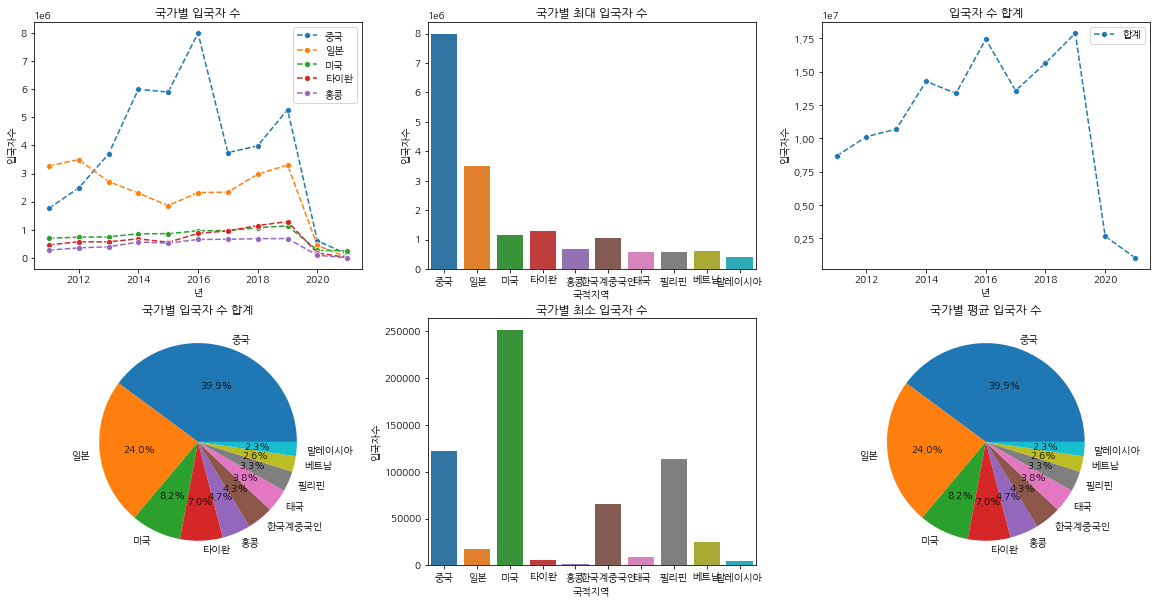

In [ ]:
%reset -f 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = '/content/drive/Othercomputers/내 컴퓨터 (3)/2022년 3학년 2학기/1.1 빅데이터처리/빅데이터 프로젝트/법무부_3(출입국심사)연도별 국적(지역)별 외국인 입국자 현황_20211231.csv'

df = pd.read_csv(filename, encoding='cp949')

합계 = df[df['국적지역'] == '합계']
중국 = df[df['국적지역'] == '중국']
일본 = df[df['국적지역'] == '일본']
미국 = df[df['국적지역'] == '미국']
타이완 = df[df['국적지역'] == '타이완']
홍콩 = df[df['국적지역'] == '홍콩']
한국계중국인 = df[df['국적지역'] == '한국계중국인']
태국 = df[df['국적지역'] == '태국']
필리핀 = df[df['국적지역'] == '필리핀']
베트남 = df[df['국적지역'] == '베트남']
말레이시아 = df[df['국적지역'] == '말레이시아']

result = pd.concat([중국, 일본, 미국, 타이완, 홍콩, 한국계중국인, 태국, 필리핀, 베트남, 말레이시아])

중국합계 = 중국['입국자수'].sum()
일본합계 = 일본['입국자수'].sum()
미국합계 = 미국['입국자수'].sum()
타이완합계 = 타이완['입국자수'].sum()
홍콩합계 = 홍콩['입국자수'].sum()
한국계중국인합계 = 한국계중국인['입국자수'].sum()
태국합계 = 태국['입국자수'].sum()
필리핀합계 = 필리핀['입국자수'].sum()
베트남합계 = 베트남['입국자수'].sum()
말레이시아합계 = 말레이시아['입국자수'].sum()

sumresult = pd.DataFrame({'중국':                 [중국합계], 
                          '일본':                 [일본합계], 
                          '미국':                 [미국합계], 
                          '타이완':             [타이완합계], 
                          '홍콩':                 [홍콩합계], 
                          '한국계중국인': [한국계중국인합계], 
                          '태국':                 [태국합계], 
                          '필리핀':             [필리핀합계], 
                          '베트남':             [베트남합계], 
                          '말레이시아':     [말레이시아합계]})

중국최대 = 중국['입국자수'].max()
일본최대 = 일본['입국자수'].max()
미국최대 = 미국['입국자수'].max()
타이완최대 = 타이완['입국자수'].max()
홍콩최대 = 홍콩['입국자수'].max()
한국계중국인최대 = 한국계중국인['입국자수'].max()
태국최대 = 태국['입국자수'].max()
필리핀최대 = 필리핀['입국자수'].max()
베트남최대 = 베트남['입국자수'].max()
말레이시아최대 = 말레이시아['입국자수'].max()

maxresult = pd.DataFrame({'국적지역':['중국', '일본', '미국', '타이완', '홍콩', '한국계중국인', '태국', '필리핀', '베트남', '말레이시아'],
                          '입국자수':[중국최대, 일본최대, 미국최대, 타이완최대, 홍콩최대, 한국계중국인최대, 태국최대, 필리핀최대, 베트남최대, 말레이시아최대]})

중국최소 = 중국['입국자수'].min()
일본최소 = 일본['입국자수'].min()
미국최소 = 미국['입국자수'].min()
타이완최소 = 타이완['입국자수'].min()
홍콩최소 = 홍콩['입국자수'].min()
한국계중국인최소 = 한국계중국인['입국자수'].min()
태국최소 = 태국['입국자수'].min()
필리핀최소 = 필리핀['입국자수'].min()
베트남최소 = 베트남['입국자수'].min()
말레이시아최소 = 말레이시아['입국자수'].min()

minresult = pd.DataFrame({'국적지역':['중국', '일본', '미국', '타이완', '홍콩', '한국계중국인', '태국', '필리핀', '베트남', '말레이시아'],
                          '입국자수':[중국최소, 일본최소, 미국최소, 타이완최소, 홍콩최소, 한국계중국인최소, 태국최소, 필리핀최소, 베트남최소, 말레이시아최소]})

중국평균 = 중국['입국자수'].mean()
일본평균 = 일본['입국자수'].mean()
미국평균 = 미국['입국자수'].mean()
타이완평균 = 타이완['입국자수'].mean()
홍콩평균 = 홍콩['입국자수'].mean()
한국계중국인평균 = 한국계중국인['입국자수'].mean()
태국평균 = 태국['입국자수'].mean()
필리핀평균 = 필리핀['입국자수'].mean()
베트남평균 = 베트남['입국자수'].mean()
말레이시아평균 = 말레이시아['입국자수'].mean()

# meanresult = pd.DataFrame({'국적지역':['중국', '일본', '미국', '타이완', '홍콩', '한국계중국인', '태국', '필리핀', '베트남', '말레이시아'],
#                           '입국자수':[중국평균, 일본평균, 미국평균, 타이완평균, 홍콩평균, 한국계중국인평균, 태국평균, 필리핀평균, 베트남평균, 말레이시아평균]})
meanresult = pd.DataFrame({'중국':                 [중국평균], 
                           '일본':                 [일본평균], 
                           '미국':                 [미국평균], 
                           '타이완':             [타이완평균], 
                           '홍콩':                 [홍콩평균], 
                           '한국계중국인': [한국계중국인평균], 
                           '태국':                 [태국평균], 
                           '필리핀':             [필리핀평균], 
                           '베트남':             [베트남평균], 
                           '말레이시아':     [말레이시아평균]})

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

# fig=plt.figure(figsize=(20,20))
# ax1=fig.add_subplot(3,2,1)
# ax2=fig.add_subplot(3,2,2)
# ax3=fig.add_subplot(3,2,3)
# ax4=fig.add_subplot(3,2,4)
# ax5=fig.add_subplot(3,2,5)
# ax6=fig.add_subplot(3,2,6)

sns.lineplot(data=중국, x='년', y='입국자수', label='중국', marker='o', linestyle='--', ax=ax1)
sns.lineplot(data=일본, x='년', y='입국자수', label='일본', marker='o', linestyle='--', ax=ax1)
sns.lineplot(data=미국, x='년', y='입국자수', label='미국', marker='o', linestyle='--', ax=ax1)
sns.lineplot(data=타이완, x='년', y='입국자수', label='타이완', marker='o', linestyle='--', ax=ax1)
sns.lineplot(data=홍콩, x='년', y='입국자수', label='홍콩', marker='o', linestyle='--', ax=ax1)
# sns.lineplot(data=한국계중국인, x='년', y='입국자수', label='한국계중국인', marker='o', linestyle='--', ax=ax1)
# sns.lineplot(data=태국, x='년', y='입국자수', label='태국', marker='o', linestyle='--', ax=ax1)
# sns.lineplot(data=필리핀, x='년', y='입국자수', label='필리핀', marker='o', linestyle='--', ax=ax1)
# sns.lineplot(data=베트남, x='년', y='입국자수', label='베트남', marker='o', linestyle='--', ax=ax1)
# sns.lineplot(data=말레이시아, x='년', y='입국자수', label='말레이시아', marker='o', linestyle='--', ax=ax1)
ax1.set(xlabel='년', ylabel='입국자수', title='국가별 입국자 수')

sns.barplot(data=maxresult,x='국적지역',y='입국자수', ax=ax2)
ax2.set(xlabel='국적지역', ylabel='입국자수', title='국가별 최대 입국자 수')

sns.lineplot(data=합계, x='년', y='입국자수', label='합계', marker='o', linestyle='--', ax=ax3)
ax3.set(xlabel='년', ylabel='입국자수', title='입국자 수 합계')

labels = ['중국', '일본', '미국', '타이완', '홍콩', '한국계중국인', '태국', '필리핀', '베트남', '말레이시아']
ax4.pie(sumresult, labels=labels, autopct='%.1f%%')
ax4.set(title='국가별 입국자 수 합계')

sns.barplot(data=minresult,x='국적지역',y='입국자수', ax=ax5)
ax5.set(xlabel='국적지역', ylabel='입국자수', title='국가별 최소 입국자 수')

# sns.barplot(data=meanresult, x='국적지역', y='입국자수', ax=ax6)
# ax6.set(xlabel='국적지역', ylabel='입국자수', title='국가별 평균 입국자 수')
labels = ['중국', '일본', '미국', '타이완', '홍콩', '한국계중국인', '태국', '필리핀', '베트남', '말레이시아']
ax6.pie(meanresult, labels=labels, autopct='%.1f%%')
ax6.set(title='국가별 평균 입국자 수')

plt.show()

In [ ]:
합계

,년,국적지역,입국자수
0,2011,합계,8666503
205,2012,합계,10121950
410,2013,합계,10678334
618,2014,합계,14264508
834,2015,합계,13359701
1047,2016,합계,17418307
1256,2017,합계,13569509
1463,2018,합계,15630522
1675,2019,합계,17880503
1887,2020,합계,2659845
